In [1]:


import  pandas as pd 
df = pd.read_csv(r'C:\Users\syachin\01-Skillfactory\Projects\Unit_2\Source_Data\tips.csv')
df.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


10.2.1 Сколько строк содержится в датафрейме без учёта заголовка? Пример формата ответа: 150

In [2]:
df_info=pd.read_csv(r'C:\Users\syachin\01-Skillfactory\Projects\Unit_2\Source_Data\tips.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
df.total_bill.max()

50.81

<AxesSubplot:>

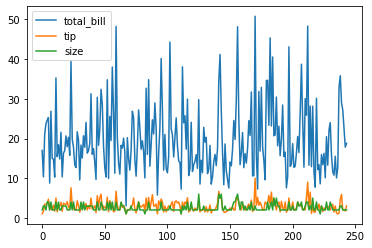

In [4]:
df.plot()

При обращении к методу plot без указания параметров компьютер построил графики для всех имеющихся в датафрейме количественных признаков. При этом на графике по оси х отложены порядковые номера данных в датафрейме (индексы), а по оси y — значения показателей.
Настройка параметров метода

Если применить метод plot не ко всему датафрейму, а только к одному столбцу, а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака:

<AxesSubplot:ylabel='Frequency'>

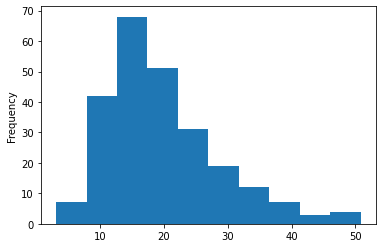

In [5]:
df.total_bill.plot(kind = 'hist')

<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>

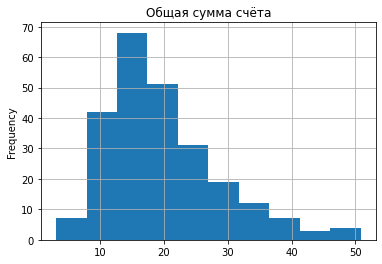

In [6]:


df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')



При работе с категориальными (нечисловыми) переменными с помощью метода plot, датафрейм необходимо предварительно обработать. Если мы хотим увидеть распределение посетителей по дням недели, нужно посчитать, сколько заказов пришлось на каждый из дней. Сделать это можно с помощью метода value_counts(), а уже к получившейся series применить метод plot. Тип графика, который мы будем использовать, — bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm:

<AxesSubplot:title={'center':'Количество поситителей по дням'}>

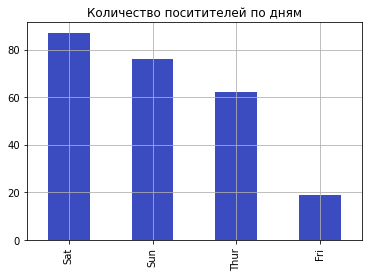

In [7]:
df['day'].value_counts().plot(kind='bar', grid=True, colormap='coolwarm', title='Количество поситителей по дням')

Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

array([<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

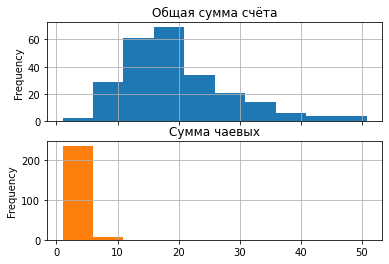

In [8]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа scatter plot:

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

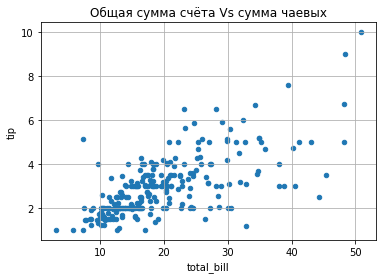

In [9]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

На этом графике можно увидеть, что более щедрые чаевые обычно оставляют посетители, которые делают более дорогие заказы, а также видны исключения из правила.

Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

<AxesSubplot:xlabel='day'>

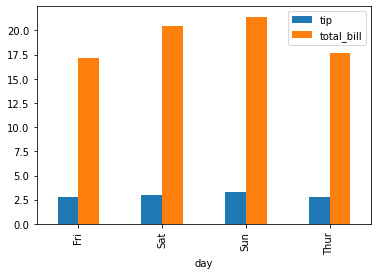

In [10]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

<AxesSubplot:xlabel='sex,smoker'>

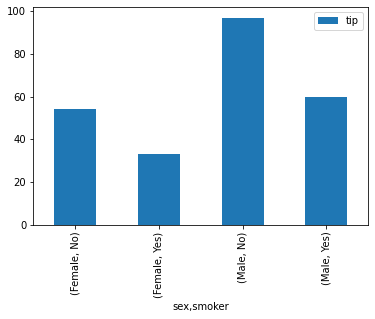

In [11]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

<AxesSubplot:ylabel='smoker'>

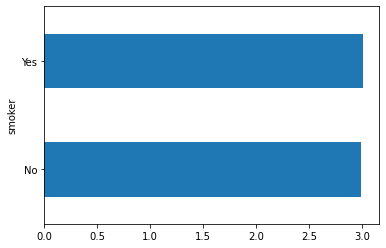

In [12]:
df.groupby('smoker')['tip'].mean().plot(kind = 'barh') 

10.5. Объектно-ориентированный подход

Объектно-ориентированный подход

Matplotlib — это библиотека Python, обладающая широкими возможностями для создания и отображения графической информации. В этом блоке мы рассмотрим основные приёмы работы с этой библиотекой на примере оформления графиков для датасета tips.csv. 

Импортируйте необходимые библиотеки, включая модуль pyplot библиотеки Matplotlib, который содержит требуемые функции и методы. Для корректного отображения графиков в ноутбуке используйте команду %matplotlib inline. Загрузите файл tips.csv.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'C:\Users\syachin\01-Skillfactory\Projects\Unit_2\Source_Data\tips.csv')



Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, он наиболее прозрачный и мощный по функционалу. Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты.

В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создаётся координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведённое место в области (ширина и высота равны 1):

plt.axes

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

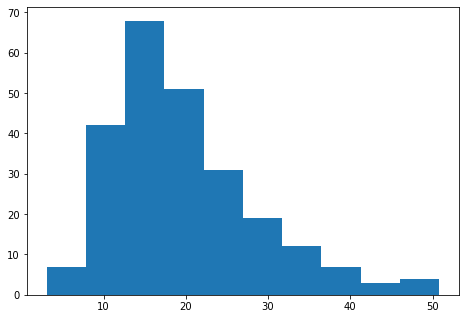

In [14]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

    axes.set_title — заголовок диаграммы;
    axes.set_ylabel — заголовок для оси ординат;
    axes.set_xlabel — заголовок для оси абсцисс.


Text(0.5, 0, 'Сумма заказа, USD')

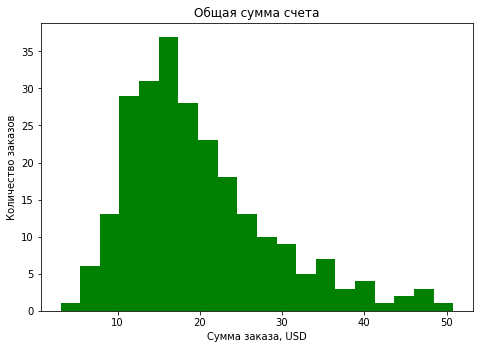

In [15]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Для размещения на координатной плоскости графиков других видов необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания scatter plot, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом scatter:

Text(0, 0.5, 'Размер чаевых')

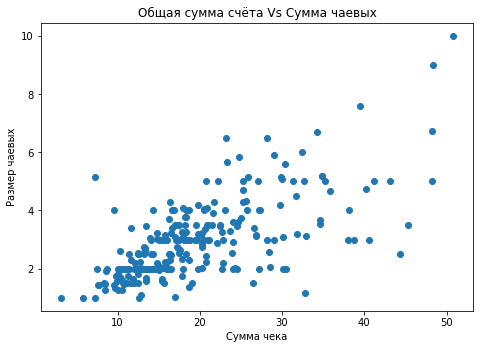

In [16]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

С помощью параметра marker можно настроить форму маркеров, используемых для отображения каждого индивидуального случая. Посмотрите другие варианты форм маркеров.

Text(0, 0.5, 'Размер чаевых')

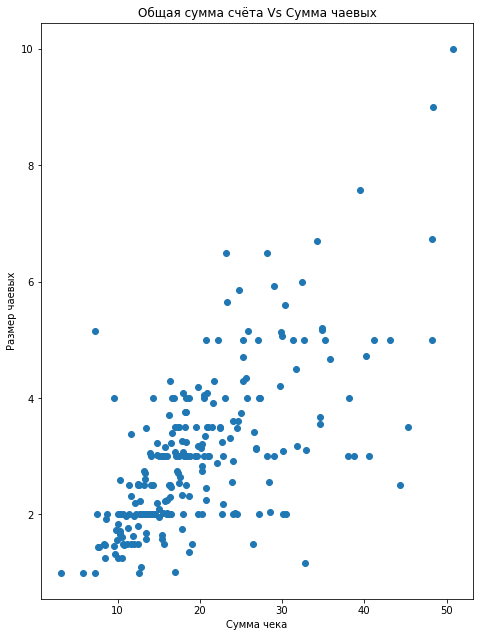

In [17]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,1,2])  
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

Text(0, 0.5, 'Размер чаевых')

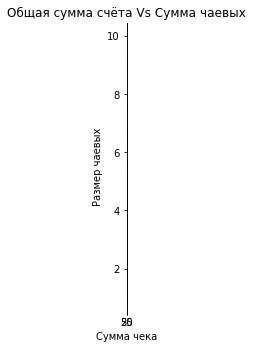

In [18]:
fig = plt.figure()
axes = fig.add_axes([1,0,0,1]) 
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

10.6. Несколько систем координат


Несколько систем координат

Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Первые два числовых параметра, указанные при создании систем координат, — это отступ слева и снизу, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

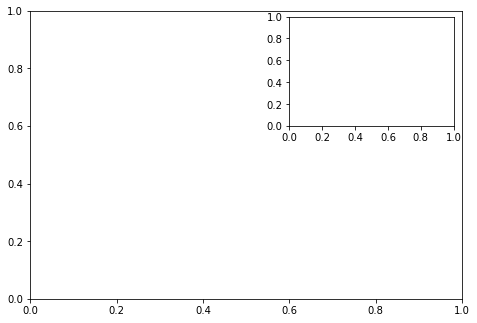

In [19]:
fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
insert_axes = fig.add_axes([0.6,0.6, 0.38, 0.38])

В основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

Создание вспомогательного графика

Работу по размещению двух графиков в одном объекте начнём с создания вспомогательного датафрейма, содержащего информацию о минимальной и максимальной сумме счёта по дням недели:

In [20]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

Для размещения каждого графика применим соответствующий метод к объекту, представляющему нужную нам систему координат: 

    к объекту main_axes применим метод hist;
    для объекта insert_axes используем метод bar.


<BarContainer object of 4 artists>

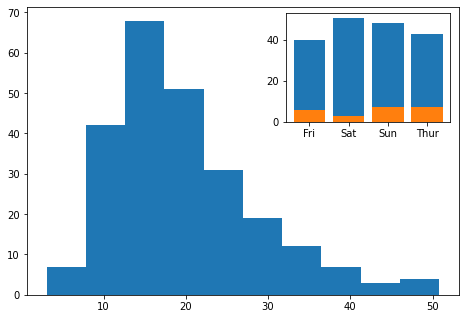

In [21]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

Недостатком графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы поработаем с настройками метода bar
Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю. С помощью параметра width мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону:

<BarContainer object of 4 artists>

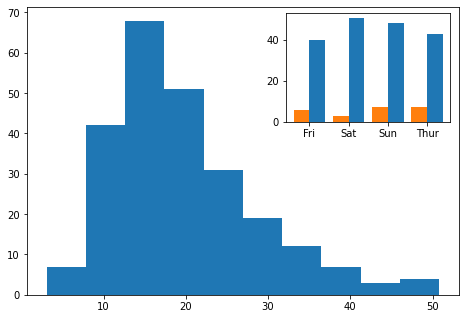

In [22]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge')

10.7. Добавление легенды

Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:

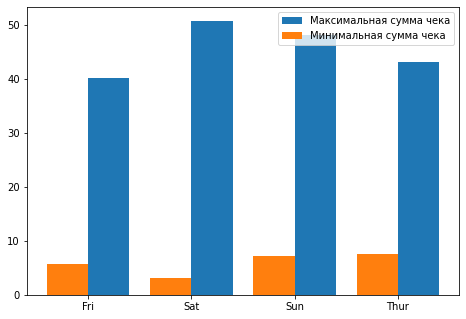

In [23]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

Для того, чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

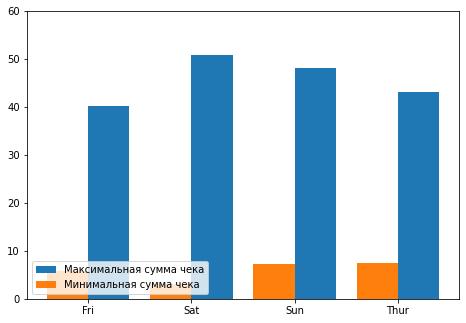

In [24]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 3)

10.8. Subplots

Subplots

Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

Text(0.5, 1.0, 'Общая сумма чаевых')

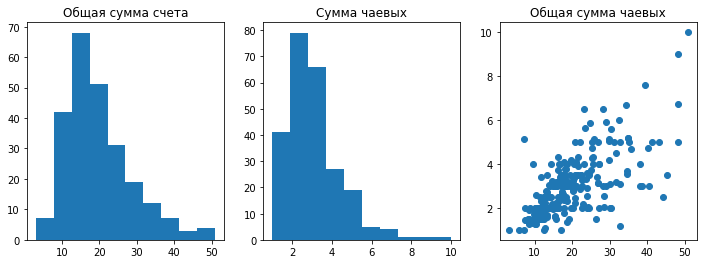

In [25]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счета')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes[2].set_title('Общая сумма чаевых')

10.9. Создание линейных графиков

Для выполнения заданий этого блока мы будем использовать не датасет, а специально сгенерированный одномерный массив NumPy. Для генерации массива нам необходимо импортировать библиотеку NumPy:

In [26]:
import numpy as np 

#Теперь сгенерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3. 
# Также создадим переменную, содержащую значения функции e^x на отрезке [-3, 3]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)


Отрисовка одной кривой

Функция matplotlib.pyplot.plot позволяет отрисовать последовательность значений. Первым аргументом подается последовательность чисел аргумента, вторым — последовательность значений функции для каждого аргумента:

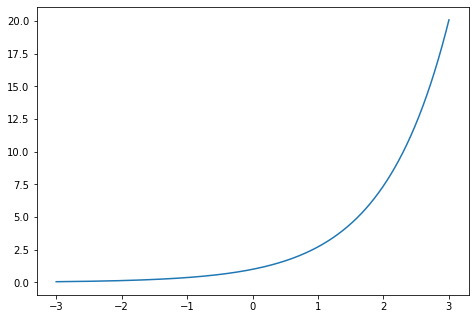

In [27]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

Отрисовка нескольких кривых

Функцию plot можно вызвать несколько раз для отрисовки дополнительного контента. В таком случае отрисовка будет выполнена в том же matplotlib.pyplot.figure, который в данном случае создается автоматически при первой отрисовке. Для примера добавим к нашему графику какой-нибудь полином третьей степени:

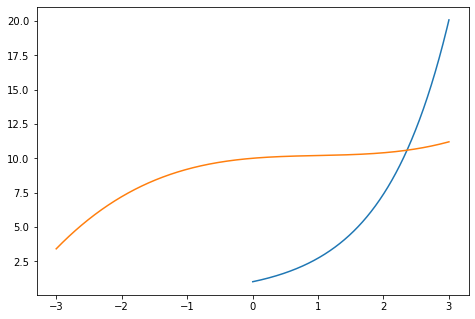

In [28]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3


fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

   Обратите внимание, полученным графикам назначены разные цвета. Эти цвета берутся из палитры по умолчанию и всегда назначаются в одном и том же порядке при добавлении новых графиков.

# Цвета и маркеры

Чтобы задать тип маркера и цвет линии, воспользуемся методом форматирования линии. Его структура — это строка, содержащая в полном виде символы, обозначающие цвет маркера, тип маркера и тип линии. Возможен пропуск любого количества из этих трёх параметров. Мы отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker):

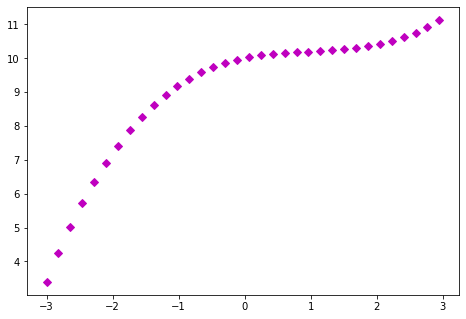

In [29]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

In [30]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

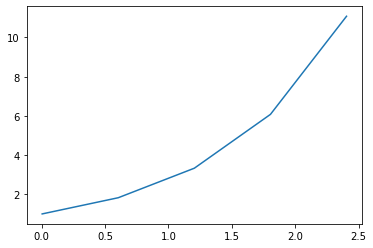

In [31]:
plt.plot(x[500::100], y1[500::100]) 

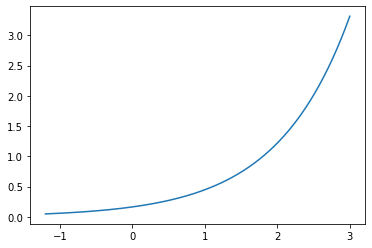

In [32]:
plt.plot(x[300:], y1[:700]) 

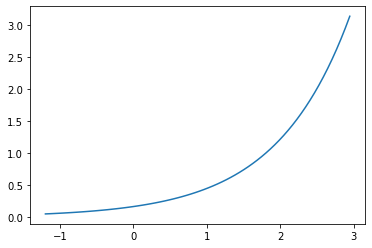

In [33]:
plt.plot(x[300::10], y1[:700:10]) 

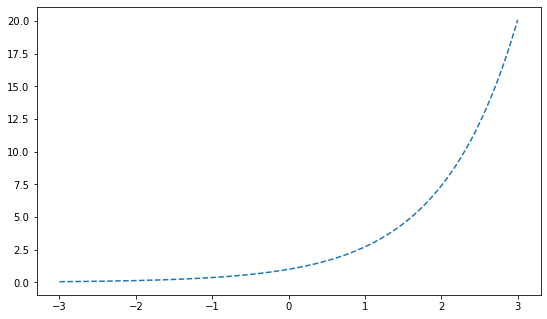

In [34]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--'  )

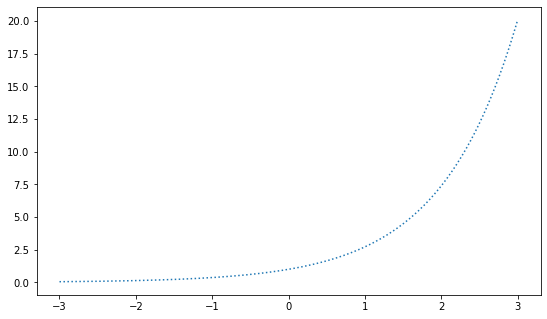

In [35]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle=':'  )

# 10.10. Гистограммы распределения признаков

Гистограммы распределения признаков

Seaborn — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и
использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что
создает дополнительные возможности для творчества при визуализации данных.

Импортируем библиотеки Seaborn, Matplotlib и Pandas для работы с датафреймами и корректного отображения информации в
jupyter notebook:

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings; warnings.simplefilter('ignore')
#При использовании некоторых методов Seaborn система может выдавать предупреждающие сообщения, что метод применяется к определенному типу данных.
# Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [37]:
df = pd.read_csv(r'C:\Users\syachin\01-Skillfactory\Projects\Unit_2\Source_Data\tips.csv')


Для построения гистограммы распределения количественных признаков в библиотеке Seaborn используется метод distplot.
Перед применением метода установим стандартные параметры отображения графиков с помощью команды sns.set():


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

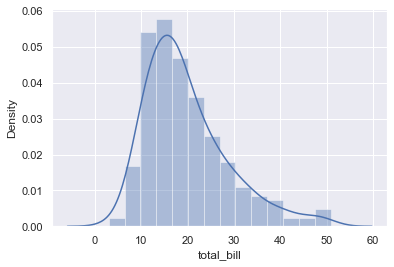

In [38]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними.
Тип графика, используемый для этого, называется jointplot:

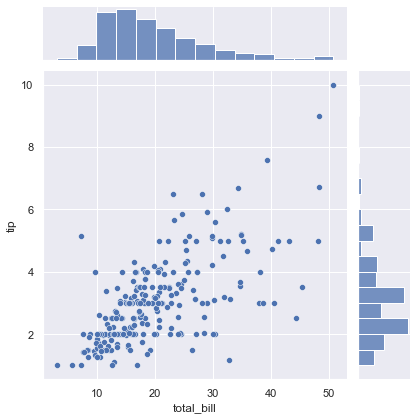

In [39]:
sns.jointplot(x='total_bill', y='tip', data = df)


Характер представления информации в центральной части графика можно регулировать с помощью параметра kind.
Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана,
но и линию регрессии, выражающую общий характер связи между двумя величинами:


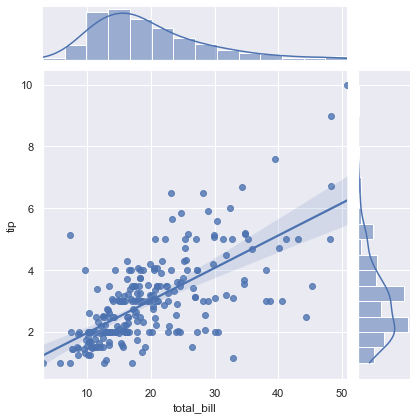

In [40]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')


Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и
особенности связей между ними — построить график типа pairplot:


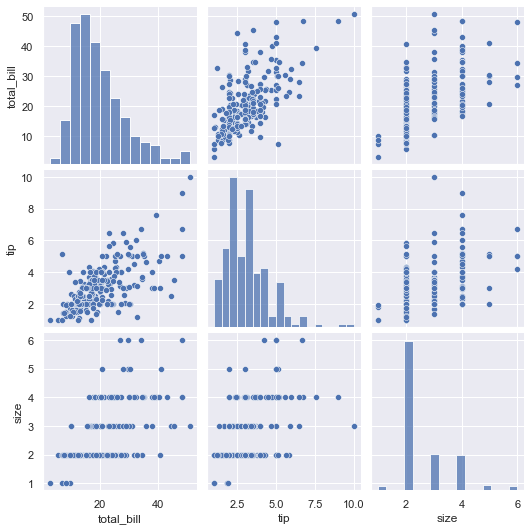

In [41]:
sns.pairplot(df)

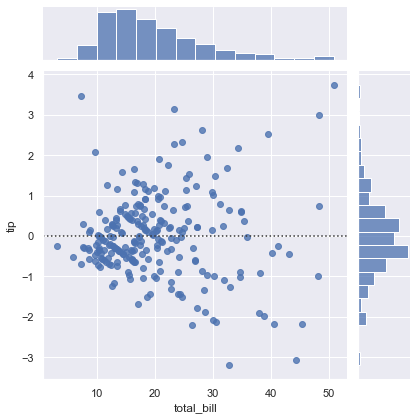

In [42]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'resid')



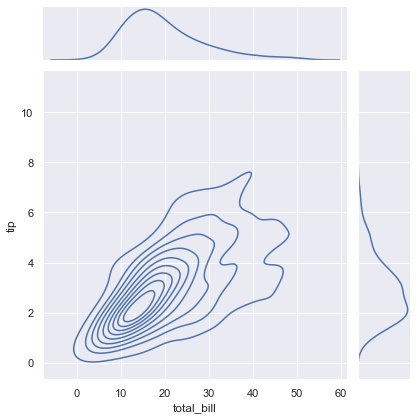

In [43]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'kde')

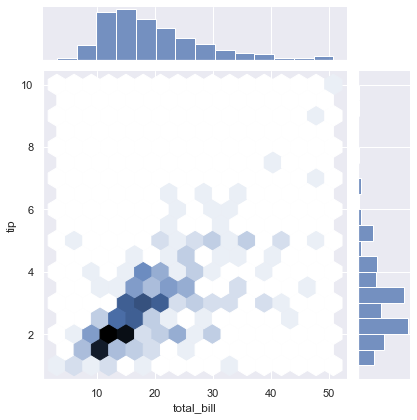

In [44]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'hex')

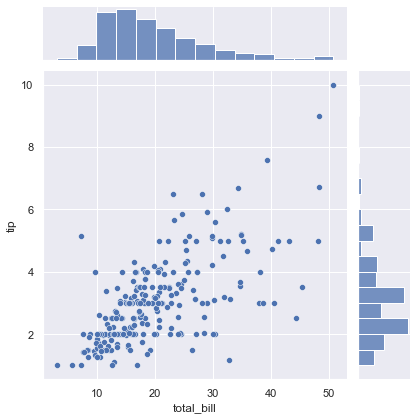

In [45]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'scatter')

# 10.11. Работа с категориальными признаками

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib
приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет:
при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы
распределения категориального признака можно воспользоваться методом countplot:



<AxesSubplot:xlabel='day', ylabel='count'>

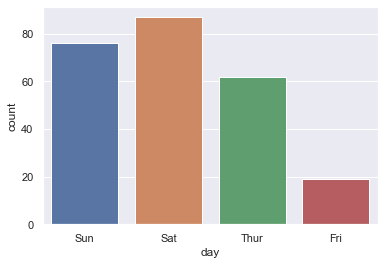

In [46]:
sns.countplot(x = 'day', data = df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot.
Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной.
По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной.
Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой
задается в параметре estimator.



<AxesSubplot:xlabel='sex', ylabel='total_bill'>

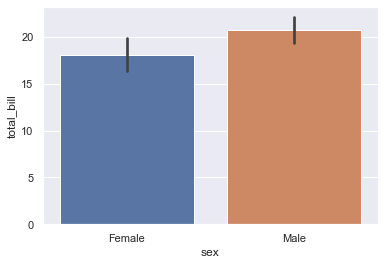

In [47]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)


График показывает, что средний чек, оплаченный клиентами-мужчинами, немного больше, чем средний чек клиентов женского пола.



Boxplots

Box plot — тип графика, компонентами которого являются:

    Отрезок (Range), отражающий диапазон значений набора данных.
    Прямоугольник (Box), который отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал.
    Усы (whiskers) — отметки на оси, представляющие левый и правый «крайние» значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5*IQR влево или вправо от левой (Q1) или правой (Q2) границы соответственно. Здесь IQR - Interquartile Range (межквартильный интервал) — ширина прямоугольника от Q1 до Q3.
    Выбросы (Outliers) — значения, находящиеся за левым и правым «крайними» значениями на оси.

<AxesSubplot:xlabel='day', ylabel='tip'>

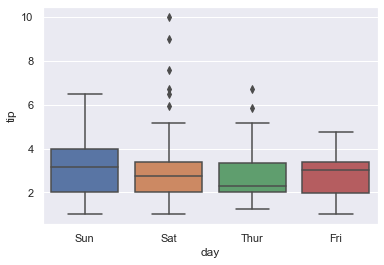

In [48]:
sns.boxplot(x = 'day', y = 'tip', data = df)

Ещё один способ увеличения информативности методов Seaborn — использование параметра hue.
Он позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака.
Посмотрите, как меняется отображение boxplot при добавлении параметра hue:



<AxesSubplot:xlabel='day', ylabel='tip'>

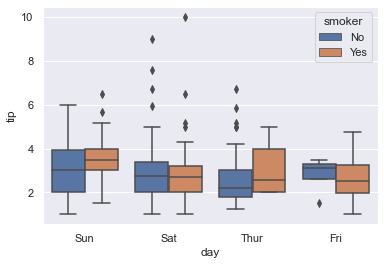

In [49]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

Такой способ представления информации позволяет нам увидеть, как изменялось распределение сумм чаевых в разные
дни недели в зонах для курящих и некурящих гостей ресторана.


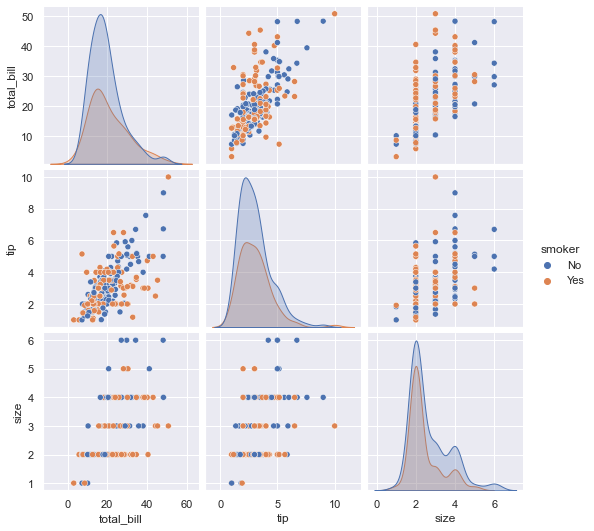

In [50]:
#Что станет результатом выполнения кода sns.pairplot(df, hue = 'smoker')?
sns.pairplot(df, hue = 'smoker')

# 10.12. Графики табличного типа


Графики табличного типа

Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты (heatmap).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:

In [51]:
correlation = df.corr()


Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True.
Для использования более ярких цветов при заливке ячеек применяем цветовую палитру coolwarm (параметр cmap):


<AxesSubplot:>

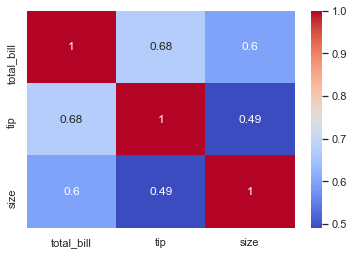

In [52]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')


# 10.13. О библиотеке


## Библиотека Plotly

Библиотека Plotly является коммерческим продуктом с бесплатной версией. С помощью этой библиотеки можно делать сложные
визуализации с элементами управления. Например, отображать 3D диаграмму с выбором опций:


Мы дадим общий обзор основных возможностей библиотеки, а при необходимости вы сможете освоить более продвинутые функции
под свои рабочие задачи.
Библиотека Plotly не входит в стандартный набор модулей Anaconda, поэтому ее следует установить.
Это можно сделать с помощью менеджера пакетов pip, который запускается из командной строки или напрямую из jupyter notebook. В случае запуска менеджера пакетов из ячейки jupyter notebook перед текстом команды нужно добавить восклицательный знак.
Введите в свободную ячейку jupyter notebook команду:



In [53]:
#!pip install plotly


In [54]:
#Для эффективного взаимодействия Plotly с датафреймами Pandas нам понадобится библиотека Cufflinks. Установите её командой:
#!pip install cufflinks

Установка каждой библиотеки производится единожды, поэтому в дальнейшем код из ячеек выполнять не нужно
и при желании его можно удалить.


# Основные типы графиков в Plotly
Перед созданием интерактивных визуализаций импортируйте необходимые библиотеки:


In [55]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline


Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:


In [56]:
init_notebook_mode(connected = True)
cf.go_offline()


Загрузите нужный датасет:

Для создания разных типов графиков в Pandas используется метод plot с различными настройками:


<AxesSubplot:>

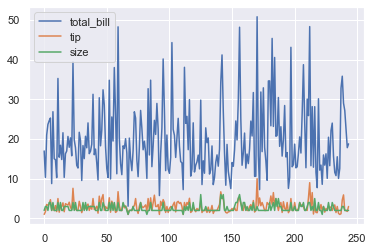

In [57]:
df.plot()


Для превращения графика в интерактивную визуализацию достаточно добавить в код всего одну букву:



In [58]:
df.iplot()

Функции графика, созданного методом iplot:

    получение в интерактивном режиме значения признака в отдельных точках;
    регулирование отображения конкретных признаков (отключение и включение данных признаков без изменения кода);
    увеличение фрагмента графика;
    сохранение полученного графика в формате png напрямую из jupyter notebook.

Как и при работе с методом plot в библиотеке Pandas, при изменении параметров метода iplot можно изменять тип и другие
особенности диаграммы. Plotly позволяет создавать новые виды графиков. Например, этот тип графика позволяет не только
показать на одной координатной плоскости сумму чека и размер чаевых для каждого заказа, но и демонстрирует, как
изменяется разность между этими двумя суммами для разных заказов:



In [59]:
df[['total_bill', 'tip']].iplot(kind = 'spread')


Bubblechart — разновидность диаграммы рассеяния (scatterplot), в которой используются три параметра. Третий параметр влияет на размер маркера, который показывает связь между значениями переменных, отложенных на оси абсцисс и оси ординат:

bubble



In [60]:
df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size = 'tip')
